In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [193]:
#importing the dataset

forest = pd.read_csv("dataset/Algerian_forest_fires_cleaned.csv",)
forest.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


Data Preparation

In [194]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [195]:
#checking for duplicatesforest.describe()

In [196]:
#checking for duplicates
forest.duplicated().sum()

0

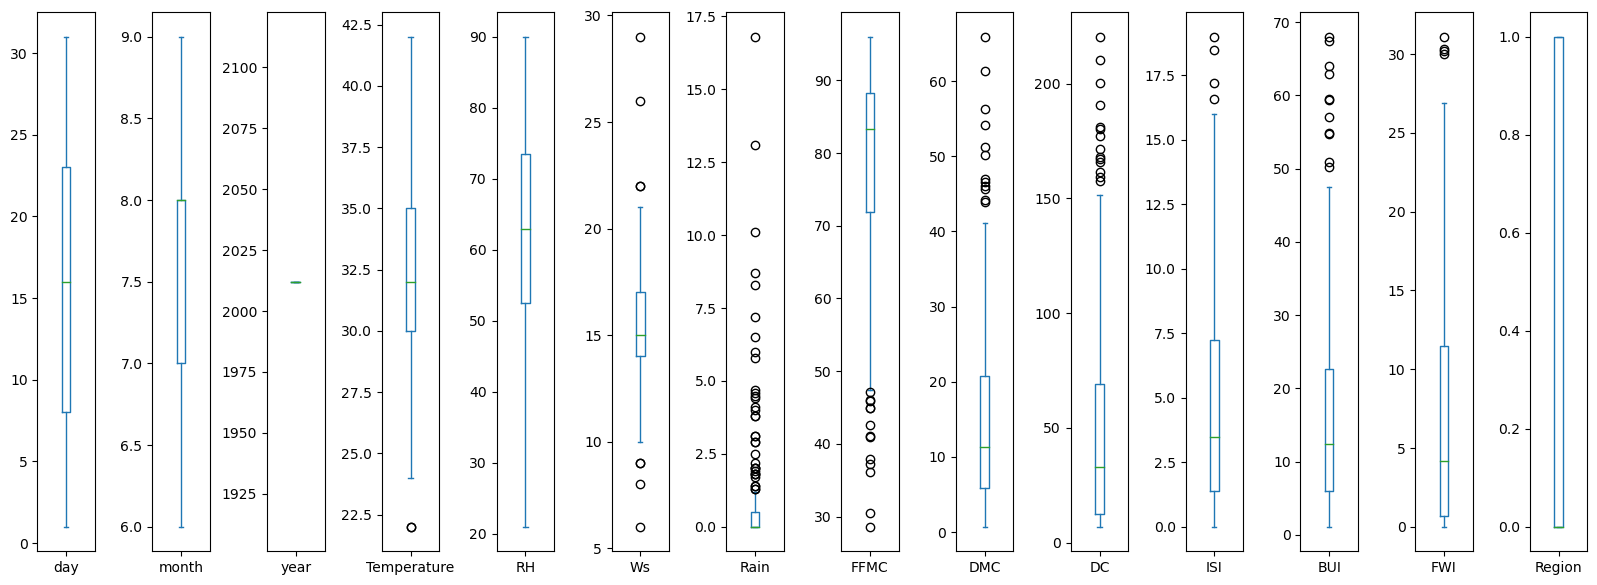

In [197]:
forest.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(20, 7)
)
plt.subplots_adjust(wspace=1) 
plt.show()

In [198]:
forest.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [199]:
#Removing outliers for every other columns other than RH
for column in ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']:
    Q1 = forest[column].quantile(0.25)
    Q3 = forest[column].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR
    forest = forest[(forest[column] >= lowerBound) & (forest[column] <= upperBound)]

In [200]:
#removing unwanted features
forest = forest.drop('Classes', axis=1)

In [201]:
forest.shape

(155, 14)

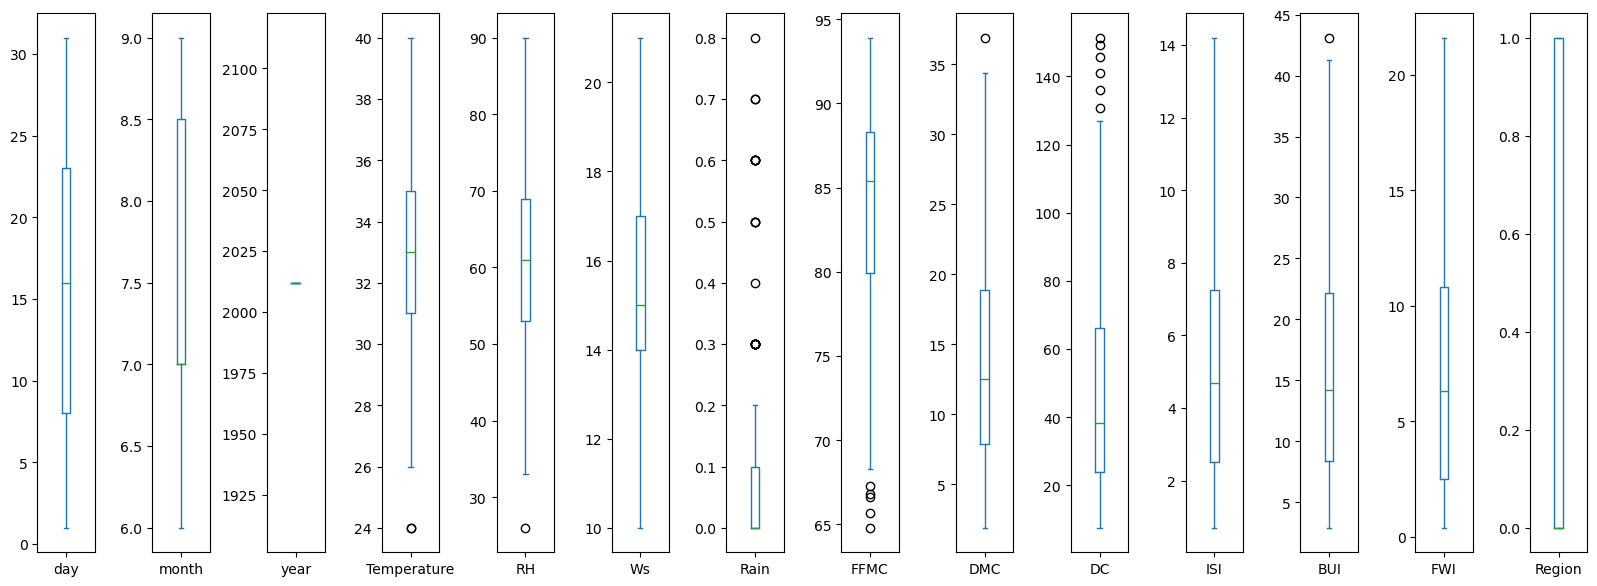

In [202]:
forest.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(20, 7)
)
plt.subplots_adjust(wspace=1) 
plt.show()

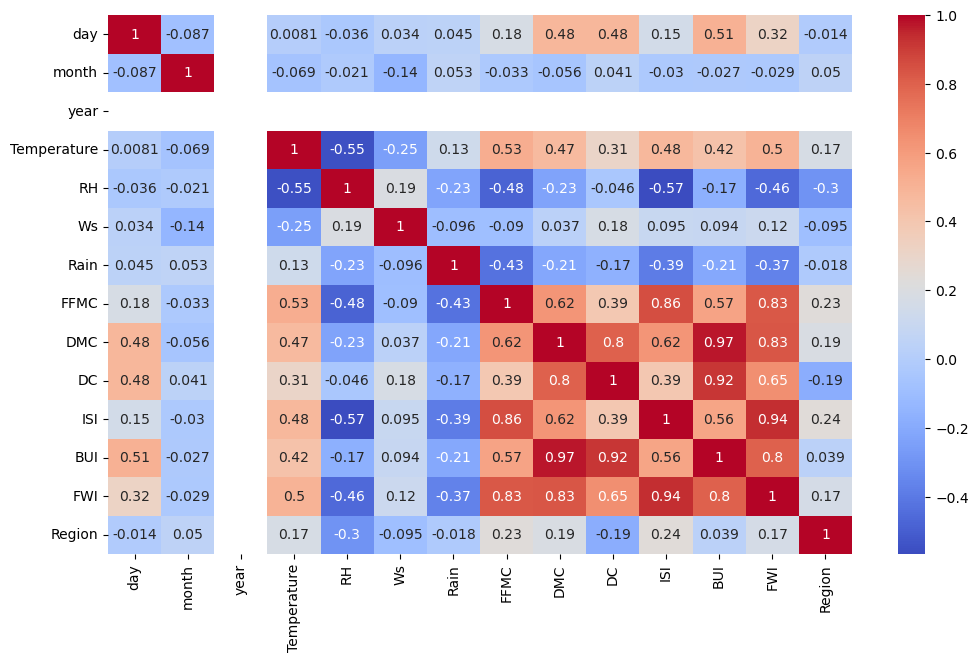

In [203]:
#heatmap
corr_matrix = forest.corr()
plt.figure(figsize=(12, 7))  
sns.heatmap(corr_matrix, annot=True,  cmap='coolwarm')
plt.show()

In [204]:
X = forest[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Region']]
Y = forest['FWI']

In [205]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)

In [206]:
sr = StandardScaler()
trainXsc = sr.fit_transform(trainX)
testXsc = sr.transform(testX)

### Model Training 1

In [207]:
#Linear Regression
lr = LinearRegression()

In [208]:
lr.fit(trainXsc, trainY)

LinearRegression()

In [209]:
lr.coef_, lr.intercept_

(array([ 7.66142189e-02,  1.03426229e-01, -3.10862447e-15,  9.70186426e-02,
        -4.35895603e-02,  4.04057221e-02, -1.74817394e-01, -3.05031870e-01,
        -6.03373627e-01, -6.78002795e-01,  3.96507877e+00,  3.43592820e+00,
        -1.45462523e-01]),
 7.499999999999999)

In [210]:
yPred = lr.predict(testXsc)

In [211]:
#Metrics for Model 1
mse = mean_squared_error(testY,yPred)
mae = mean_absolute_error(testY,yPred)
r2 = r2_score(testY,yPred)
print("LR Model 1 MSE : ", mse)
print("LR Model 1 MAE : ", mae)
print("LR Model 1 R2 : ", r2)

LR Model 1 MSE :  0.23429979069022014
LR Model 1 MAE :  0.364720990248604
LR Model 1 R2 :  0.9909192646893801


### Model Training 2

In [212]:
#After considering correlation and Coefficients from model 1 removed some columns
X = forest[['month', 'Temperature', 'RH', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
sr = StandardScaler()
trainXsc = sr.fit_transform(trainX)
testXsc = sr.transform(testX)

In [213]:
lrModel2 = LinearRegression()
lrModel2.fit(trainXsc, trainY)
lrModel2.coef_, lrModel2.intercept_

(array([ 0.06876483,  0.03428875,  0.09023618, -0.2512949 , -1.02488525,
        -0.70096689,  4.08661105,  3.88384949]),
 7.499999999999999)

In [214]:
yPred = lrModel2.predict(testXsc)
mse = mean_squared_error(testY,yPred)
mae = mean_absolute_error(testY,yPred)
rsq = r2_score(testY,yPred)
print("LR Model 2 MSE : ", mse)
print("LR Model 2 MAE : ", mae)
print("LR Model 2 R2 : ", rsq)

LR Model 2 MSE :  0.22594358023092412
LR Model 2 MAE :  0.33571037847202007
LR Model 2 R2 :  0.9912431255650436


Pickling The Model

In [215]:
import pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lrModel2, file)
with open('scaler_model.pkl', 'wb') as file:
    pickle.dump(sr, file)

Reading Pickled Files

In [216]:
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
with open('scaler_model.pkl', 'rb') as file2:
    loaded_scaler = pickle.load(file2)

### Predicting On Unseen Data

In [217]:
X_data = [[7,31,64,86.8,17.8,71.8,6.7,21.6],
[9,34,53,89,21.6,80.3,9.2,25.8],
[9,32,55,89.1,25.5,88.5,7.6,29.7],
[7,32,47,79.9,18.4,84.4,2.2,23.8],
[7,33,50,88.7,22.4,92.8,7.2,28.3],
[10,29,68,59.9,2.5,8.6,1.1,2.9],
[9,27,75,55.7,2.4,8.3,0.8,2.8],
[8,33,66,63.1,2.7,9.2,1.3,3],
]

y_data = [10.6,15,13.9,3.9,12.9,0.4,0.3,0.5]

In [218]:
scaledX = loaded_scaler.transform(X_data)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [219]:
yPred = loaded_model.predict(scaledX)
mse = mean_squared_error(y_data,yPred)
mae = mean_absolute_error(y_data,yPred)
r2 = r2_score(dataY,yPred)
print("Linear Model MSE : ", mse)
print("Linear Model MAE : ", mae)
print("Linear Model R2 : ", r2)

Linear Model MSE :  0.4338040176409863
Linear Model MAE :  0.5872415824789594
Linear Model R2 :  0.9884090490303711


### Conclusion

Following the training of Linear Regression Model 1, the r2 score was 0.988, indicating that 99% of the dependent variance could be predicted. The average difference from the actual value is represented by MAE(0.58), while the error from the actual value is represented by MSE(0.22).

Following the removal of certain columns and taking into account the linear model 1, we trained the linear regression model 2 and obtained a 0.99 r2 score, meaning that 99% of the dependent variance can be predicted. The average difference from the actual value is represented by MAE(0.33), while the error from the actual value is represented by MSE(0.22). For MSE and MAE, there is a small variation from Linear Regression Model 1.

Further more we can improve the data either by increasing the number of features and also since the dataset is small in records we can improve the model by training with a increased data